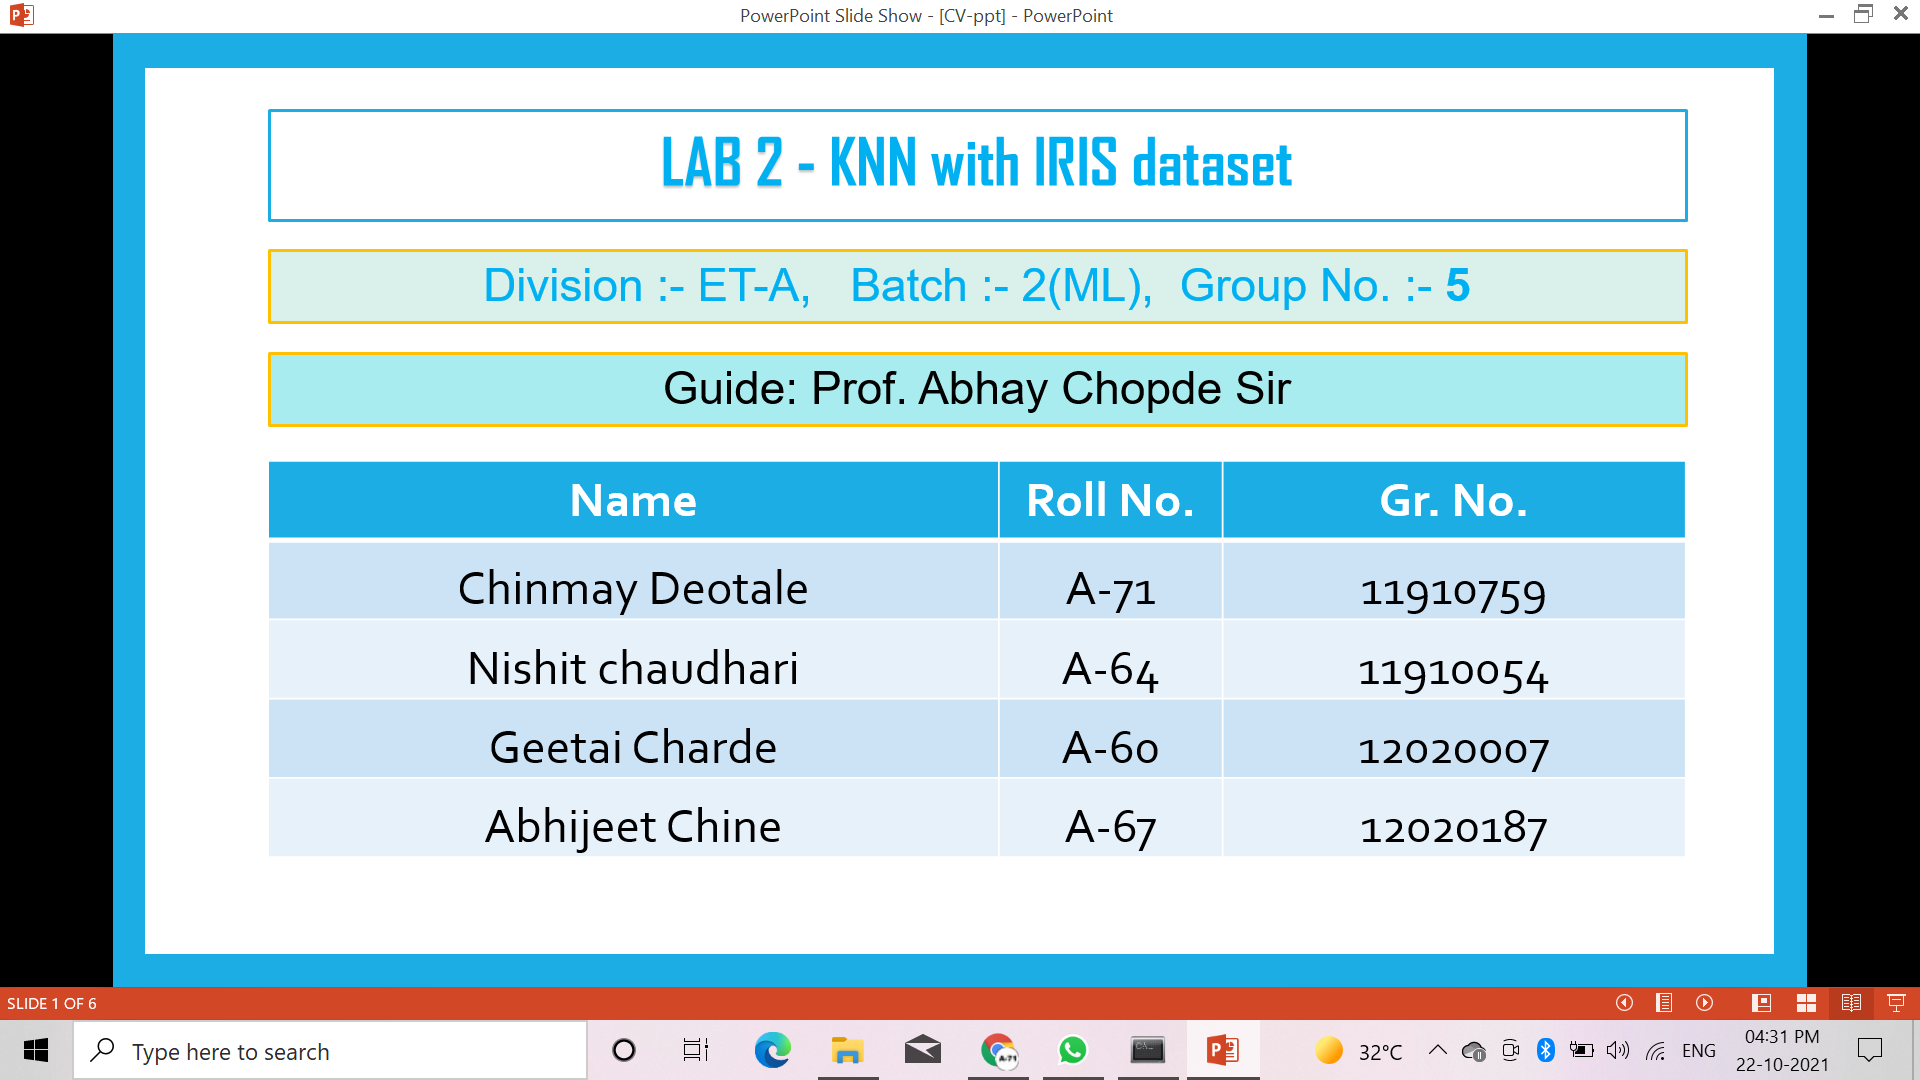

In [1]:
from IPython.display import Image
Image("img/Screenshot (7).png")
# <img src="Screenshot(7).png" alt="Drawing" style="width: 900px; height=160px ;"/>

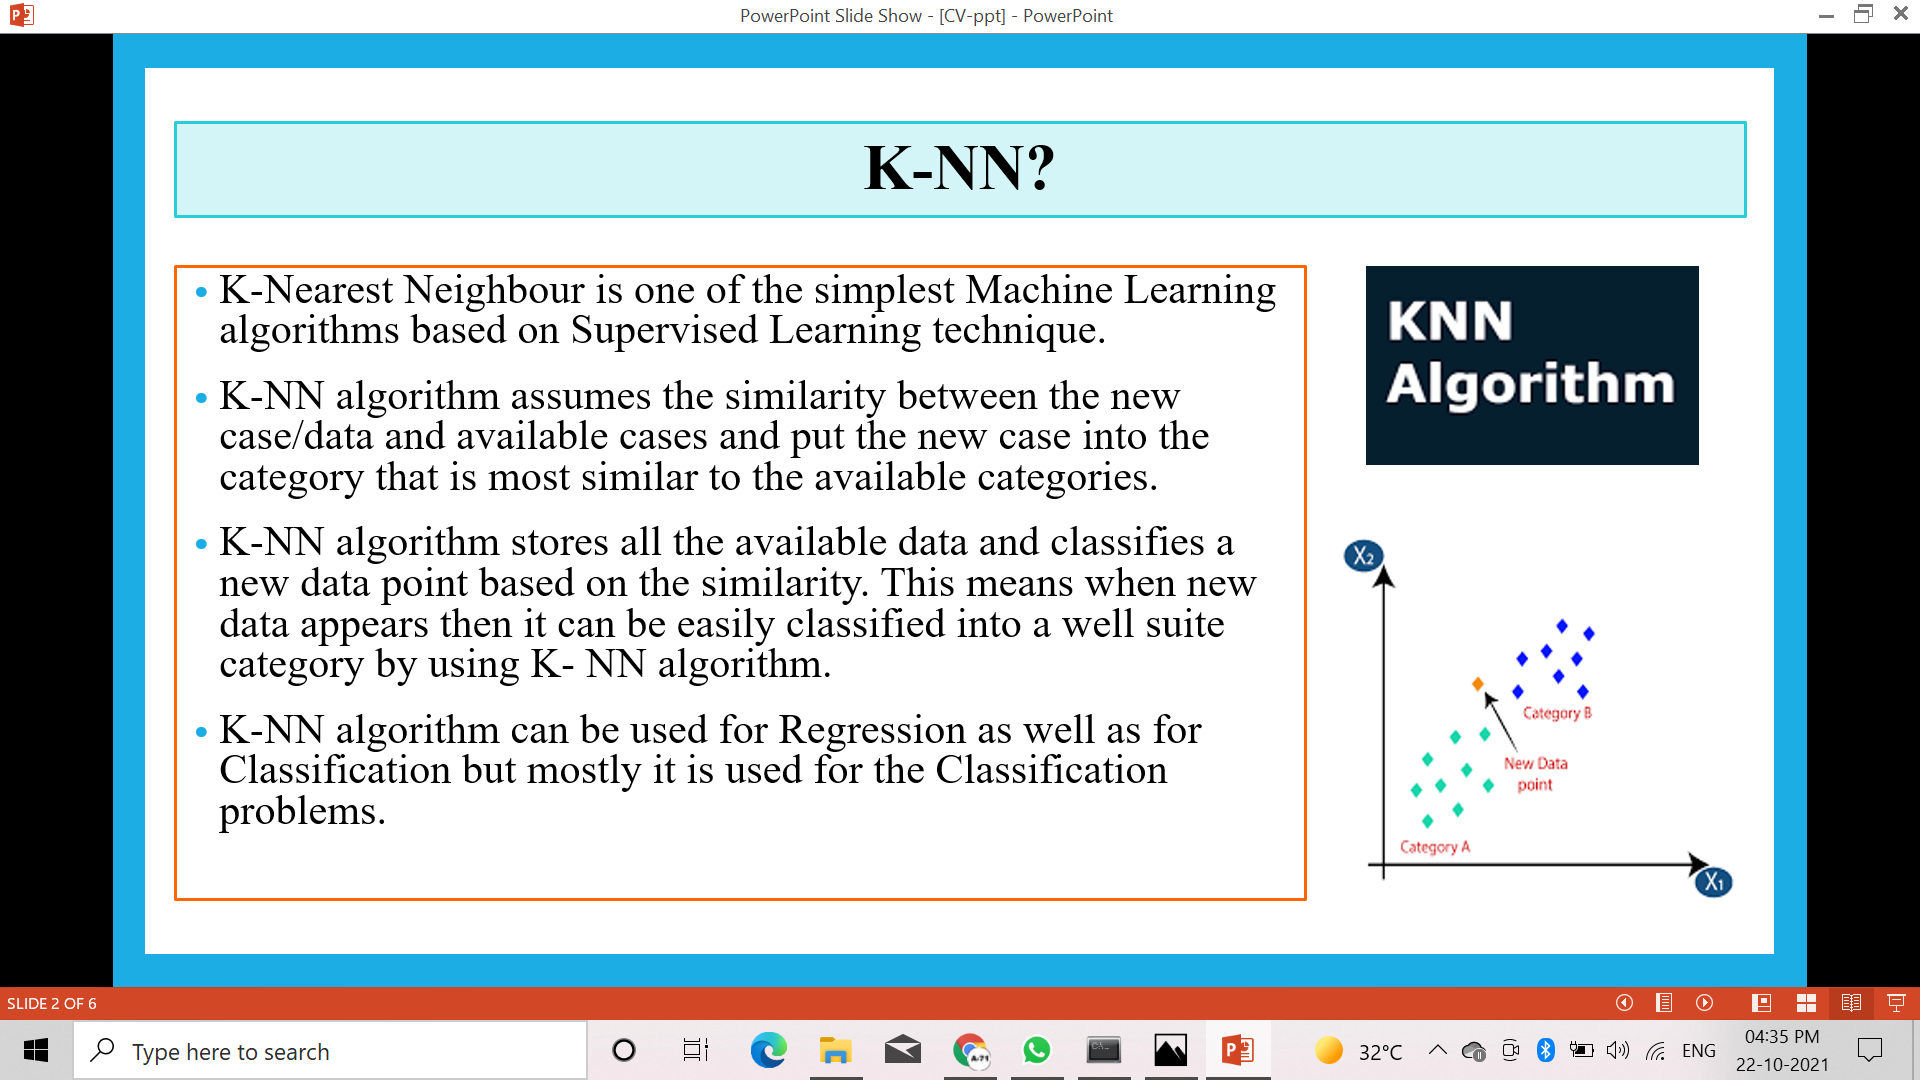

In [2]:
Image("img/Screenshot (8).png")

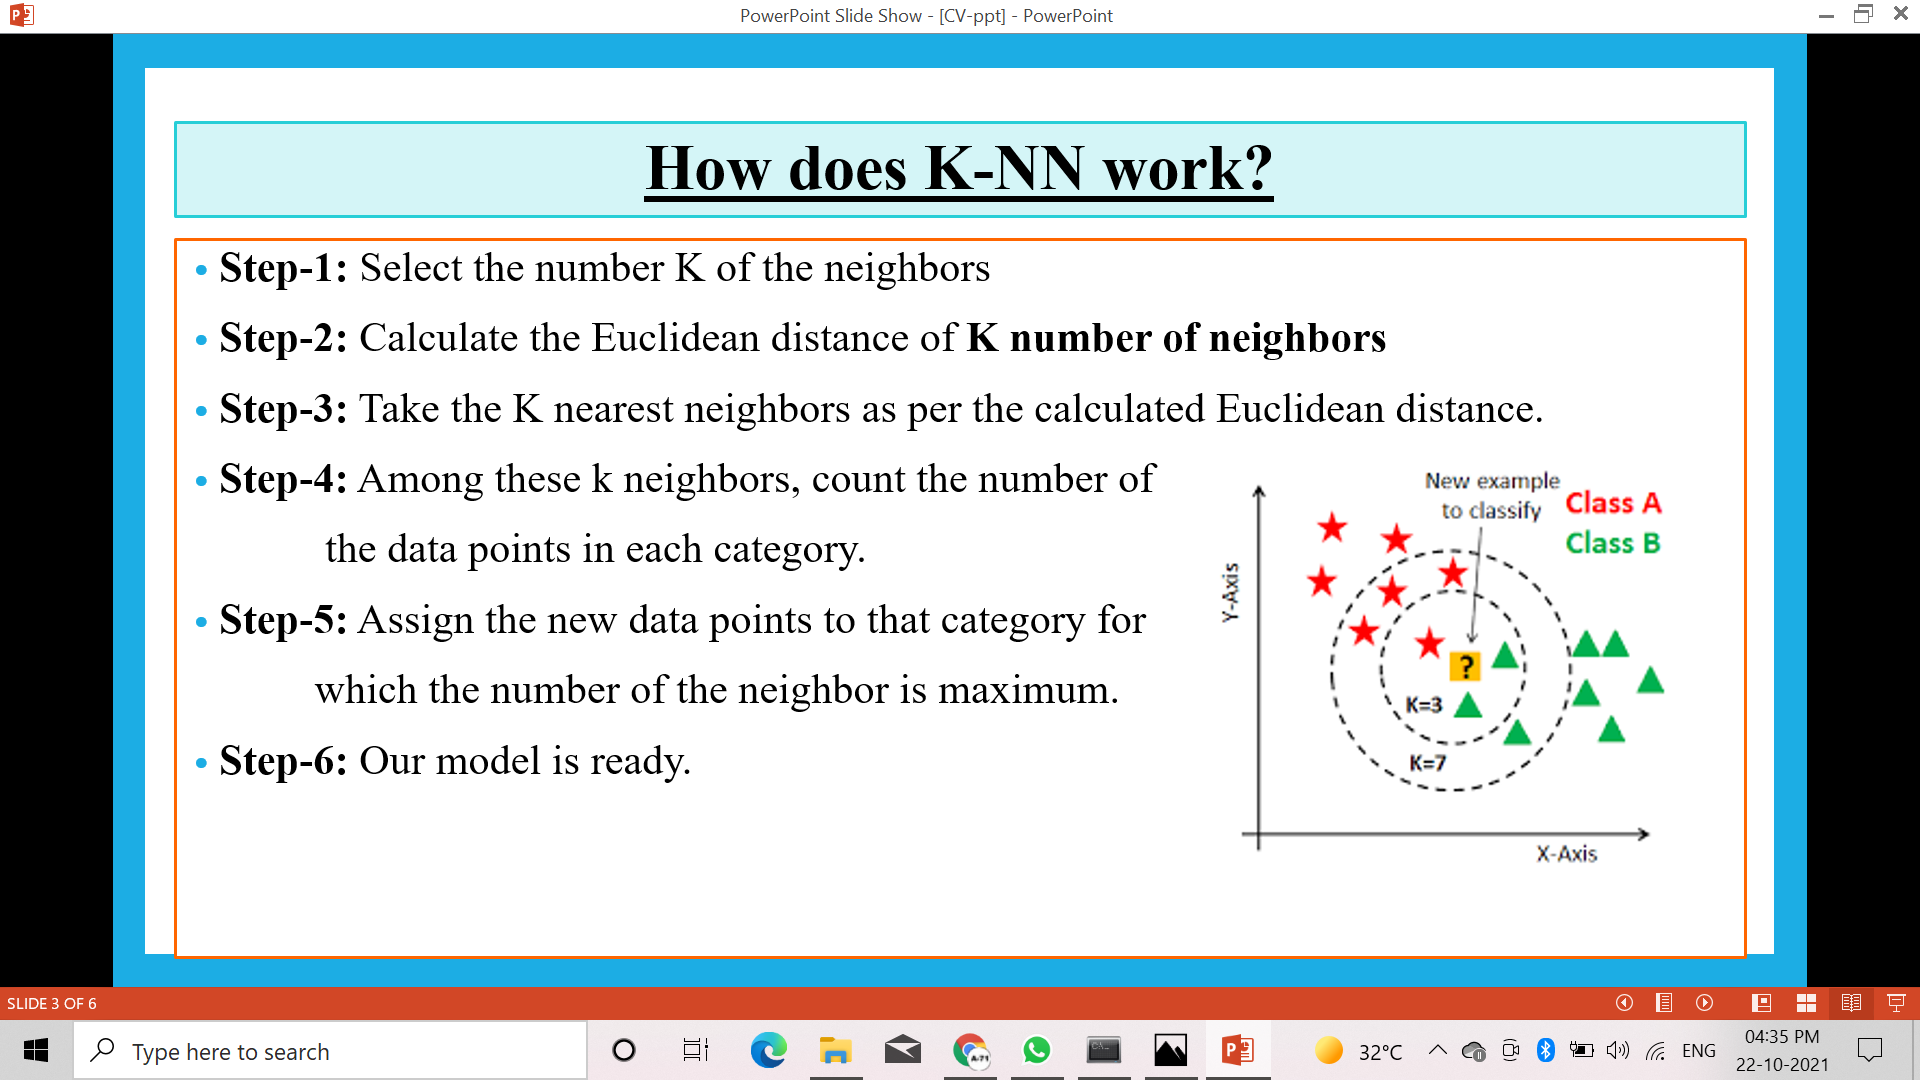

In [3]:
Image("img/Screenshot (9).png")

In [4]:
# Step 1: Define the objective of the Problem Statement
# To identify species of iris flower from SL,SW,PL,PW

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Gathering

In [6]:
df = pd.read_csv("iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Preparation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Split data into training and testing

In [8]:
X = df.iloc[: , :4]
X.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = df['species']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=3)

In [11]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (105, 4)
X_test : (45, 4)
y_train : (105,)
y_test : (45,)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

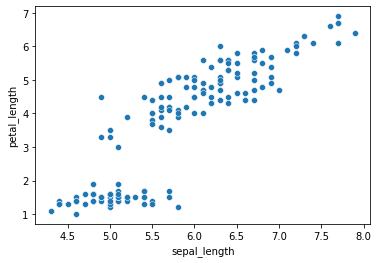

In [12]:
sns.scatterplot(df['sepal_length'],df['petal_length'])

# Building KNN Machine Learning Model

In [13]:
#Model creation for k = 3
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 3)
print("Model created sucessfully..!!!")
KNN_model

Model created sucessfully..!!!


KNeighborsClassifier(n_neighbors=3)

In [14]:
#Model Training
KNN_model.fit(X_train,y_train)
print("Model training sucessfully..!!!")

Model training sucessfully..!!!


In [15]:
# find y_pred
y_pred = KNN_model.predict(X_test)

In [16]:
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica'], dtype=object)

In [17]:
#Find Accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for k=3 : ",acc*100)

Accuracy for k=3 :  95.55555555555556


In [18]:
#Model creation for k = 5
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
print("Model created sucessfully..!!!")

#Model Training
KNN_model.fit(X_train,y_train)
print("Model training sucessfully..!!!")

# find y_pred
y_pred = KNN_model.predict(X_test)

#Find Accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for k=5 : ",acc*100)

Model created sucessfully..!!!
Model training sucessfully..!!!
Accuracy for k=5 :  95.55555555555556


# Model Evaluation and Optimization

In [19]:
#dynamic programm
accuracy = []
for x in range (1,30,2):
    #Model creation 
    KNN_model = KNeighborsClassifier(n_neighbors = x)
    

    #Model Training
    KNN_model.fit(X_train,y_train)


    # find y_pred
    y_pred = KNN_model.predict(X_test)

    #Find Accuracy
    acc = metrics.accuracy_score(y_test, y_pred)
    
    #save accuracy
    accuracy.append(acc)
    
print("All accuracy saved!!!...")
    

All accuracy saved!!!...


In [20]:
print(accuracy, end = ' ')

[0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333] 

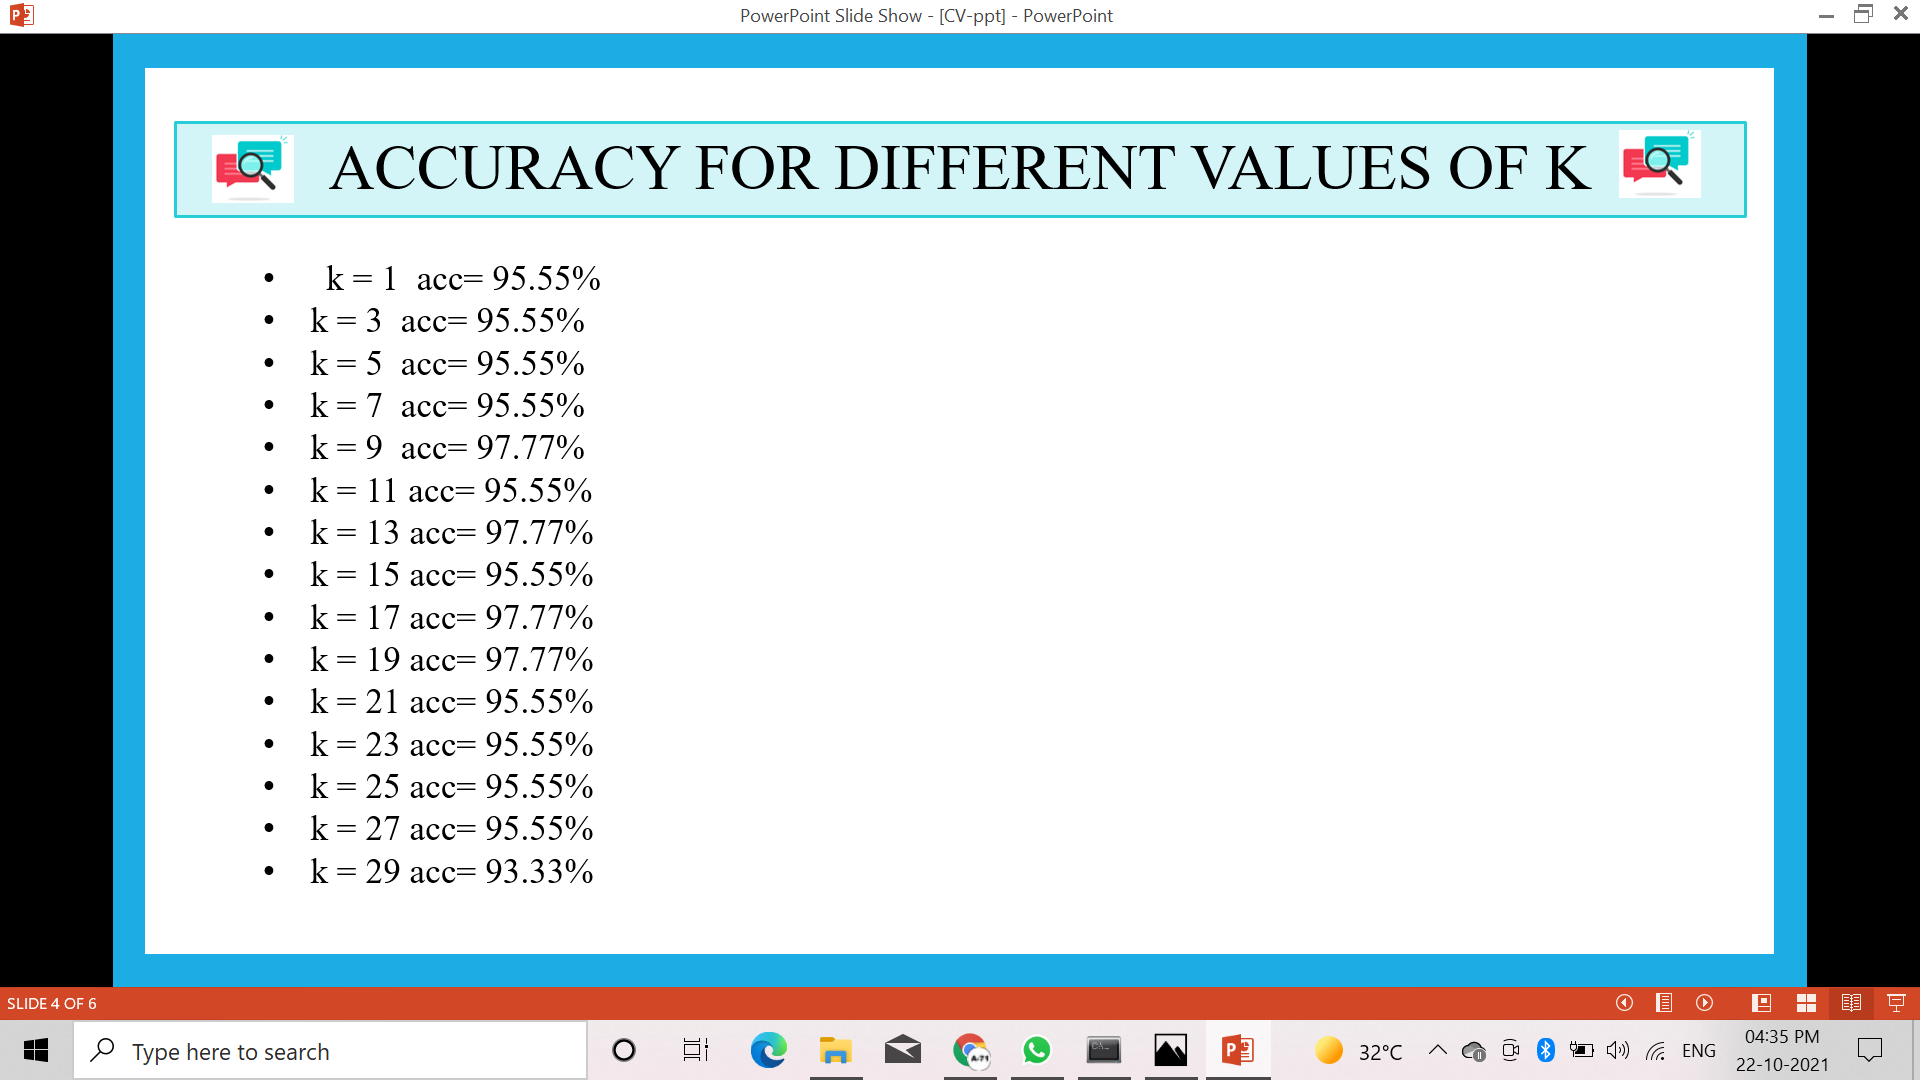

In [21]:
Image("img/Screenshot (10).png")

Text(0, 0.5, 'Accuracy')

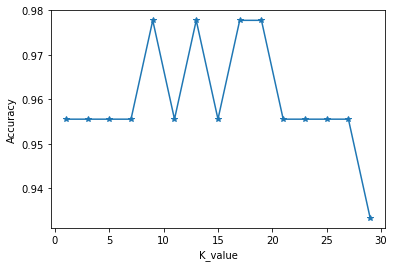

In [22]:
plt.plot(range (1,30,2), accuracy, '-*')
plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [23]:
#from above graph k= 9,13,17,19 are the values with maximum accuracy 
#for iris dataset k=9 will be final value
#Model creation for k = 9
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 9)
print("Model created sucessfully..!!!")

#Model Training
KNN_model.fit(X_train,y_train)
print("Model training sucessfully..!!!")

# find y_pred
y_pred = KNN_model.predict(X_test)

#Find Accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for k=9 : ",acc*100)

Model created sucessfully..!!!
Model training sucessfully..!!!
Accuracy for k=9 :  97.77777777777777


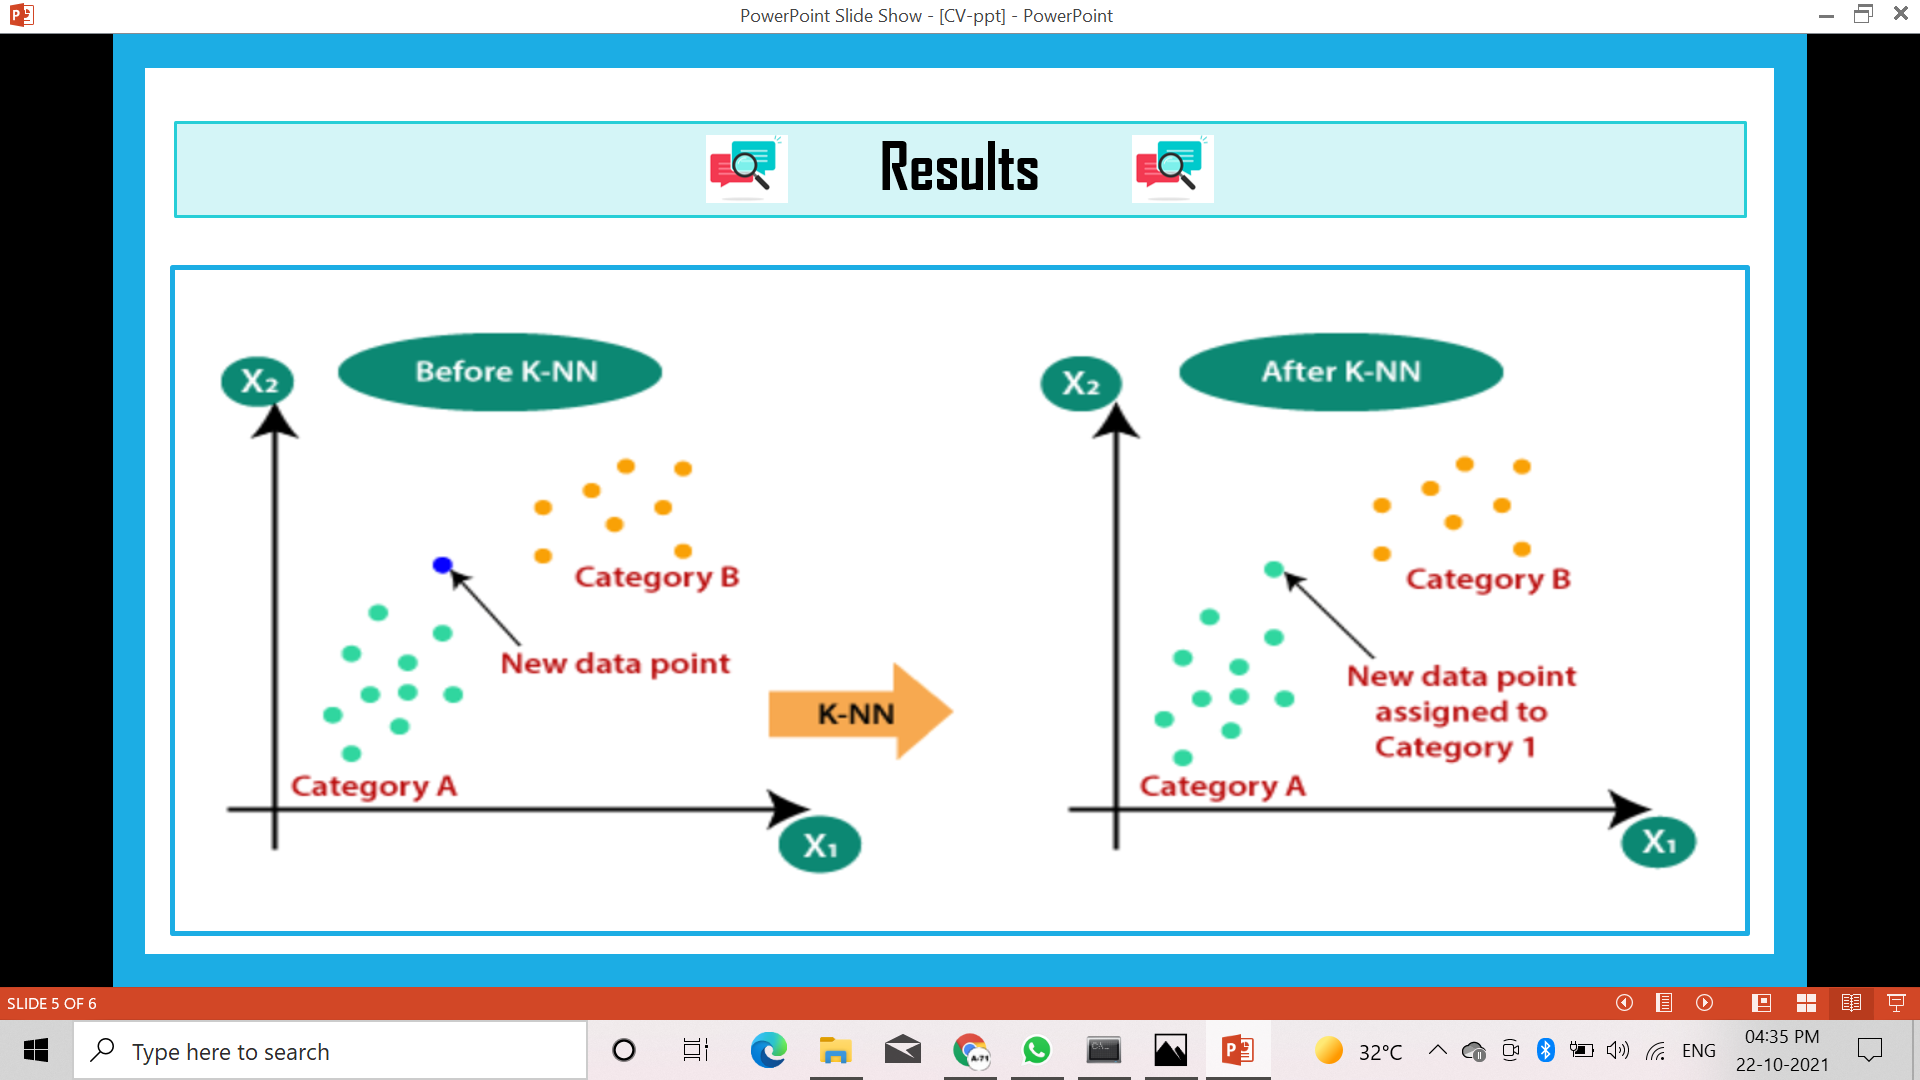

In [24]:
Image("img/Screenshot (11).png")

# Prediction

In [ ]:
SL = float(input("Sepal Length = "))
SW = float(input("Sepal Width = "))
PL = float(input("Petal Length = "))
PW = float(input("Petal Width = "))

In [ ]:
KNN_model.predict([[SL,SW,PL,PW]])